In [1]:
import numpy as np
import sklearn as sk
from sklearn.datasets import load_iris
from sklearn import model_selection

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
X = iris['data']
y = iris['target']

X.shape

(150, 4)

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [4]:
import importlib
rf = importlib.import_module("random-forests")

In [5]:
decision_tree = rf.DecisionTree(max_depth=100, min_leaf_size=1, n_candidates=100, criterion='gini')
decision_tree.fit(X_train, y_train, feature_type="continuous")

In [6]:
decision_tree.data_range

array([array([4.9, 7. ]), array([2. , 3.3]), array([3.3, 4.9]),
       array([1. , 1.7])], dtype=object)

In [7]:
y_predicted = decision_tree.predict(X_test)

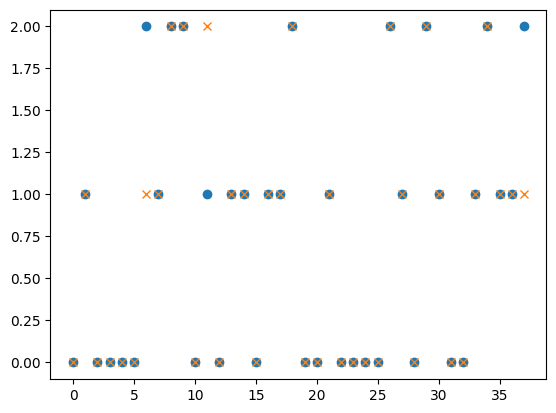

In [8]:
from matplotlib import pyplot as plt

xs = [i for i in range(len(y_test))]

fig = plt.figure(1)
plt.plot(xs, y_test, 'o')
plt.plot(xs, y_predicted, 'x')

In [10]:
cat = list(["a" for n in range(150)])
for n in range(150):
    if X[n, 3] <= 0.8:
        cat[n] = "s"
    elif 0.8 < X[n, 3] <= 1.6:
        cat[n] = "m"
    elif X[n, 3] > 1.6:
        cat[n] = "l"

X[10, 3], cat[10], X[60, 3], cat[60], X[110, 3], cat[110]


(0.2, 's', 1.0, 'm', 2.0, 'l')

In [18]:
copyX = X.copy()
copyX = np.array(copyX, dtype=object)
copyX[:, 3] = cat
copyX

array([[5.1, 3.5, 1.4, 's'],
       [4.9, 3.0, 1.4, 's'],
       [4.7, 3.2, 1.3, 's'],
       [4.6, 3.1, 1.5, 's'],
       [5.0, 3.6, 1.4, 's'],
       [5.4, 3.9, 1.7, 's'],
       [4.6, 3.4, 1.4, 's'],
       [5.0, 3.4, 1.5, 's'],
       [4.4, 2.9, 1.4, 's'],
       [4.9, 3.1, 1.5, 's'],
       [5.4, 3.7, 1.5, 's'],
       [4.8, 3.4, 1.6, 's'],
       [4.8, 3.0, 1.4, 's'],
       [4.3, 3.0, 1.1, 's'],
       [5.8, 4.0, 1.2, 's'],
       [5.7, 4.4, 1.5, 's'],
       [5.4, 3.9, 1.3, 's'],
       [5.1, 3.5, 1.4, 's'],
       [5.7, 3.8, 1.7, 's'],
       [5.1, 3.8, 1.5, 's'],
       [5.4, 3.4, 1.7, 's'],
       [5.1, 3.7, 1.5, 's'],
       [4.6, 3.6, 1.0, 's'],
       [5.1, 3.3, 1.7, 's'],
       [4.8, 3.4, 1.9, 's'],
       [5.0, 3.0, 1.6, 's'],
       [5.0, 3.4, 1.6, 's'],
       [5.2, 3.5, 1.5, 's'],
       [5.2, 3.4, 1.4, 's'],
       [4.7, 3.2, 1.6, 's'],
       [4.8, 3.1, 1.6, 's'],
       [5.4, 3.4, 1.5, 's'],
       [5.2, 4.1, 1.5, 's'],
       [5.5, 4.2, 1.4, 's'],
       [4.9, 3

In [12]:
XX_train, XX_test, yy_train, yy_test = model_selection.train_test_split(copyX, y)


In [13]:
decision_tree = rf.DecisionTree(max_depth=100, min_leaf_size=1, n_candidates=100, criterion='gini')
decision_tree.fit(XX_train, yy_train, feature_type=[0, 0, 0, 1])

In [14]:
decision_tree.data_range


array([array([6. , 6.7]), array([2.7, 3. ]), array([4.8, 5. ]),
       array(['l', 'm'], dtype=object)], dtype=object)

In [15]:
yy_predicted = decision_tree.predict(XX_test)

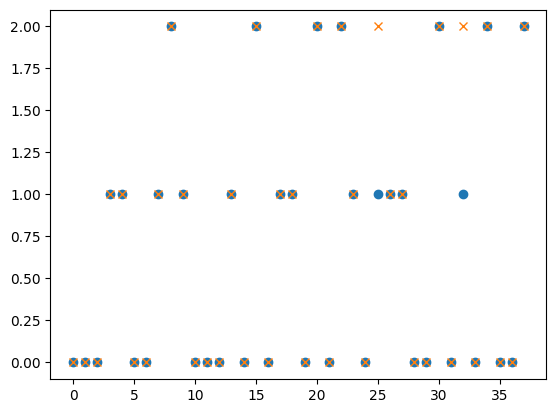

In [19]:
from matplotlib import pyplot as plt

xxs = [i for i in range(len(yy_test))]

fig = plt.figure(1)
plt.plot(xxs, yy_test, 'o')
plt.plot(xxs, yy_predicted, 'x')